<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-2/blob/main/Stats_by_Python8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis test examples
>* Define the null hypothesis.
>* Figure out how to simulate it.
>* Determine how to test it by defining the p value - what it means to be more extreme in order to compute the p value.

In [ ]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np
import pandas as pd

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/mlb_nohitters.csv'
nohitter_game_no = np.loadtxt(fname=file_path, skiprows=1, usecols=range(0,2), delimiter=',')
nht_dead = []
nht_live = []
#print(nohitter_game_no)
for i in range(len(nohitter_game_no)-1):
  nohitter_times = nohitter_game_no[i+1,1] - nohitter_game_no[i,1]
  if(nohitter_game_no[i,0] < 19200000) :
    nht_dead.append(nohitter_times)
    #print(nohitter_game_no[i,0], nohitter_times)
  else:
    nht_live.append(nohitter_times)

In [70]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [71]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [73]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [76]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
    
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [ ]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


Text(0, 0.5, 'CDF')

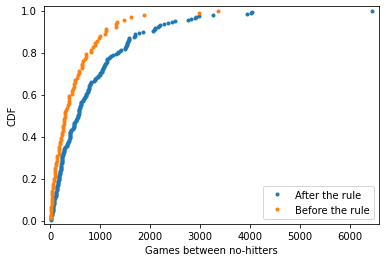

In [99]:
# Create an ECDF from real data: x, y
x, y = ecdf(nht_dead)

# Create a CDF from theoretical samples: x_theor, y_theor
x_, y_ = ecdf(nht_live)

# Overlay the plots
plt.plot(x_, y_, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.legend(['After the rule', 'Before the rule'])
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

In [98]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0002
